In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


# Student Performance Dataset Analysis for HW 7

We are examining the Student Performance Dataset with a focus on evaluating students' performance across three distinct evaluations: G1, G2, and G3. These evaluations might represent different terms, semesters, or assessment types within an academic cycle.

### Null Hypothesis (H0):

The null hypothesis asserts that there is no significant variance in the mean performance scores of students across the three evaluations. This suggests a consistency in average student performance throughout G1, G2, and G3, indicating no significant fluctuation in student scores from one evaluation to the next.

Formally stated:
- **H0: μ₁ = μ₂ = μ₃**

Where:
- μ₁ denotes the mean student performance in the first evaluation (G1),
- μ₂ denotes the mean student performance in the second evaluation (G2), and
- μ₃ denotes the mean student performance in the third evaluation (G3).

### Alternative Hypothesis (H1):

Contrary to the null hypothesis, the alternative hypothesis posits that there is a significant difference in the mean performance scores of students in at least one of the evaluations when compared to the others. This implies that student performance exhibits variability in at least one evaluation, indicating a significant shift in student scores across the evaluations.

Formally stated:
- **H1: At least one μ differs from the others**

This implies we are seeking evidence to support any of the following: μ₁ ≠ μ₂, μ₁ ≠ μ₃, or μ₂ ≠ μ₃, which would indicate a significant change in student performance in at least one of the evaluation periods compared to the others.

#### Statistical Approach:

To assess these hypotheses, we will employ a one-way ANOVA (Analysis of Variance) test, which is suitable for comparing the means of three or more independent groups (in this case, the evaluations G1, G2, and G3). The one-way ANOVA is designed to determine if there are any statistically significant differences between the means of three or more unrelated groups.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performanceformance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  

# Combine the features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)
# making sure the data set is clean 
df = df.dropna()
#only focusing on G1,G2,G3
df = df.iloc[:,-3:]
df

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
...,...,...,...
644,10,11,10
645,15,15,16
646,11,12,9
647,10,10,10


### Having completed the data cleaning and extraction process, we are now poised to conduct a one-way ANOVA test. This statistical analysis will help us explore the differences in means across the three evaluations, G1, G2, and G3, within the Student Performance Dataset. We have set the significance level (alpha) at 0.05 for this test.


In [24]:
# Perform One-Way ANOVA
f_value, p_value = stats.f_oneway(df['G1'], df['G2'], df['G3'])

# Output the results
print("F-value:", f_value)
print("P-value:", p_value)

F-value: 4.893496018970207
P-value: 0.007587757775788152


### Given that the P-value from the one-way ANOVA test is 0.0076, which is less than the significance level (alpha) of 0.05, we reject the null hypothesis (H0). This decision indicates that there is sufficient statistical evidence to support the alternative hypothesis (H1), suggesting significant differences in the mean performances across the evaluations G1, G2, and G3.

### To further investigate and pinpoint the specific pairs of evaluations that exhibit significant differences in their mean performances, we will conduct a Tukey's Honestly Significant Difference (HSD) test. Tukey's HSD is a post-hoc analysis that helps identify distinct group pairs with statistically significant mean differences, providing a more detailed understanding of the relationships between evaluation scores.


In [29]:
# Prepare the data for Tukey's HSD test
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['G1', 'G2', 'G3'])
df_melt.columns = ['index', 'Evaluations', 'Value']

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=df_melt['Value'], groups=df_melt['Evaluations'], alpha=0.05)

# Print the results of Tukey's HSD test
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    G1     G2    0.171 0.5533 -0.2157 0.5577  False
    G1     G3   0.5069 0.0061  0.1202 0.8936   True
    G2     G3   0.3359 0.1036 -0.0508 0.7226  False
---------------------------------------------------


### Based on the outcomes of the Tukey's Honestly Significant Difference (HSD) test:

- **μ₁ = μ₂**: The test results do not provide sufficient evidence to reject the hypothesis that the mean scores for evaluations G1 and G2 are equal. Therefore, we fail to reject this hypothesis, suggesting that the performance across these two evaluations is statistically indistinguishable.

- **μ₁ ≠ μ₃**: In contrast, the comparison between evaluations G1 and G3 shows a significant difference in mean scores, compelling us to reject the hypothesis of equal means. This indicates a notable variation in performance between these two evaluation periods.

- **μ₂ = μ₃**: Similar to the G1 and G2 comparison, the test results for G2 and G3 do not provide enough evidence to reject the hypothesis of equal means. Thus, we fail to reject this hypothesis, indicating no significant statistical difference in performance between evaluations G2 and G3.

### Finally, we will create a box plot to visualize the distribution of scores across the three evaluations (G1, G2, G3) in the Student Performance Dataset.


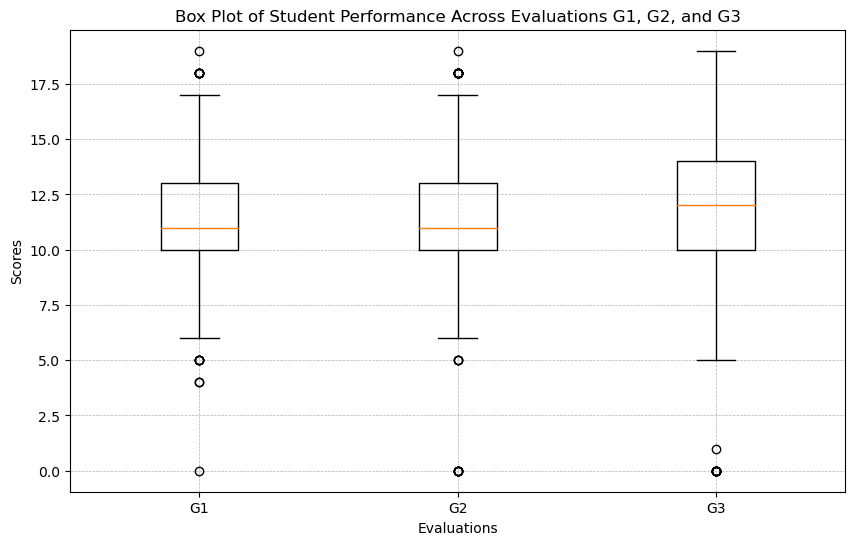

In [31]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['G1'], df['G2'], df['G3']], labels=['G1', 'G2', 'G3'])
plt.title('Box Plot of Student Performance Across Evaluations G1, G2, and G3')
plt.ylabel('Scores')
plt.xlabel('Evaluations')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Interpretation of Results

When examining the box plot alone, discerning statistical differences in performance across the evaluations G1, G2, and G3 is challenging due to the overlapping interquartile ranges and the presence of outliers. Visually, the distinctions between evaluations may not be immediately apparent.

However, the Tukey's Honestly Significant Difference (HSD) test offers a more precise statistical analysis. When we set the significance level at alpha = 0.05, the Tukey test provides a clear result. It indicates that while there is no significant difference in means between G1 and G2 or between G2 and G3, there is a statistically significant difference between G1 and G3. This reveals the value of statistical testing in uncovering differences that are not easily observed through visual means alone.
 
# Final Remarks

The statistical evidence, supported by the ANOVA and further delineated by the Tukey HSD test, indicates that while students' performance scores remained stable from G1 to G2, there was a notable improvement by the time of the G3 evaluation compared to G1. The lack of a significant difference between G2 and G3 suggests that this improvement or change in performance primarily occurred after G1 and remained through G3.

These findings underscore the importance of continued assessment and support for students throughout their academic journey, as changes in performance can be both positive and varied. For educators and stakeholders, these insights can inform targeted interventions to sustain and enhance student learning outcomes over time.


## Reflections on Decision Tree Modeling in DS 210

In my previous course DS 210, we constructed a decision tree model that deliberately excluded the features G1, G2, and G3 to avoid inflating the model's accuracy. Now, I wanted to recreate that model with the help of G1, G2,and G3.  


Mean Squared Error for 5 nodes with 2 features: 4.668711656441718
Mean Squared Error for 10 nodes with 2 features: 3.128834355828221
Mean Squared Error for 15 nodes with 2 features: 3.067484662576687
Mean Squared Error for 20 nodes with 2 features: 1.01840490797546
Mean Squared Error for 25 nodes with 2 features: 1.0613496932515338
Mean Squared Error for 30 nodes with 2 features: 1.0736196319018405


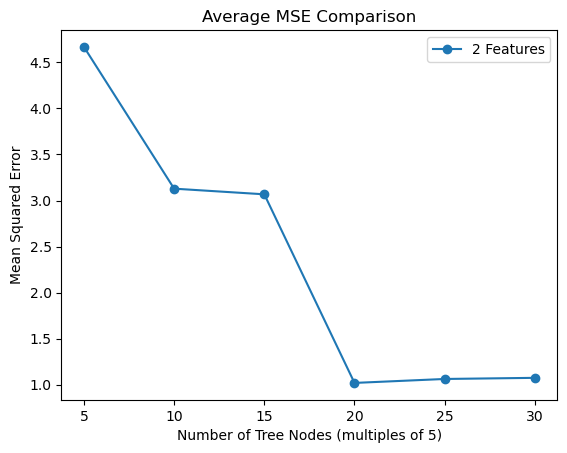

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
node_5 = [5, 10, 15, 20, 25, 30]
features = ['G1','G2']
#declaring a mse_arr so that we can plot it later 
mse_arr = []
X,y = df[features],df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=401)

# Loop through node_5
for node in node_5:
    clf = DecisionTreeClassifier(max_leaf_nodes=node)
    clf = clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    mse_arr.append(mse)

    print(f"Mean Squared Error for {node} nodes with {len(features)} features: {mse}")

plt.plot(node_5, mse_arr, marker='o', label=f'{len(features)} Features')


plt.xlabel('Number of Tree Nodes (multiples of 5)')
plt.ylabel('Mean Squared Error')
plt.title('Average MSE Comparison')
plt.legend()  
plt.show()

### Insights on Decision Tree Complexity and Data Selection

As we expected, the MSE is quite low  when the number of Tree Nodes >= 20. Previously, the lowest MSE I can get to is 13.

Data selection is the cornerstone of effective model training. It determines the ceiling of a model's predictive capabilities and its capacity to generalize from training data to real-world applications. As our experience suggests, the inclusion of pivotal features like G1 and G2 can drastically enhance a model's accuracy, given their substantial predictive weight concerning the final outcome, G3.

